In [1]:
import numpy as np
import os
import random
import cv2
import math
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.preprocessing.image import img_to_array
from keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from keras.layers import  MaxPooling2D
from keras.models import Model, Sequential
from keras.utils import plot_model
from imutils import paths

Using TensorFlow backend.


**Import Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
x=[]
y=[]
errorPath=[]
count=0
imagePaths = sorted(list(paths.list_images("/content/drive/My Drive/Flower Data")))
random.seed(42)
random.shuffle(imagePaths)
# loop over the input images
i=4323
for imagePath in imagePaths:
    # load the image, pre-process it, and store it in the data list
    try:
        print(i,imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (96, 96))
        image = img_to_array(image)
        x.append(image)
        i=i-1
        # extract the class label from the image path and update the
        # labels list
        label = imagePath.split(os.path.sep)[-2]
        y.append(label)
  
    except:
        count += 1
        errorPath.append(imagePath)

# scale the raw pixel intensities to the range [0, 1]
x = np.array(x, dtype="float") / 255.0
y = np.array(y)


**Generate Train and Test Datasets**

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

**Observe Shape of Data**

In [5]:
print(type(x_train), x_train.shape)
print(type(y_train), y_train.shape)
print(type(x_test), x_test.shape)
print(type(y_test), y_test.shape)

<class 'numpy.ndarray'> (3458, 96, 96, 3)
<class 'numpy.ndarray'> (3458,)
<class 'numpy.ndarray'> (865, 96, 96, 3)
<class 'numpy.ndarray'> (865,)


In [6]:
lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

**Create Model**

In [258]:
#Create the Models Architecture
model = Sequential()

#First Convolution Layer
model.add(Conv2D(256,(3,3),activation='relu',input_shape=(96,96,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

#Adding another Convolution Layer
model.add(Conv2D(128,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Adding another Convolution Layer
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Adding a Flattening Layer
model.add(Flatten())

#Add a layer with 512 neorons
model.add(Dense(512, activation='relu'))

#Add a layer with 256 neorons
model.add(Dense(256, activation='relu'))

#Add a layer with 128 neorons
model.add(Dense(128, activation='relu'))

#Add a Drop Out Layer
model.add(Dropout(0.5))

#Add a layer with 5 neorons, because there are 5 different classifications
model.add(Dense(5, activation='softmax'))

Compiling the Model


In [259]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

Fitting the Model

In [260]:
hist = model.fit(x_train, y_train,
                 batch_size = 256,
                 epochs = 10,
                 validation_split = 0.2)

Train on 2766 samples, validate on 692 samples
Epoch 1/10
2766/2766 [==============================] - 3s 944us/step - loss: 1.5842 - accuracy: 0.2498 - val_loss: 1.4344 - val_accuracy: 0.3338
Epoch 2/10
2766/2766 [==============================] - 2s 857us/step - loss: 1.4285 - accuracy: 0.3641 - val_loss: 1.3031 - val_accuracy: 0.4003
Epoch 3/10
2766/2766 [==============================] - 2s 856us/step - loss: 1.2532 - accuracy: 0.4472 - val_loss: 1.1967 - val_accuracy: 0.4595
Epoch 4/10
2766/2766 [==============================] - 2s 856us/step - loss: 1.1765 - accuracy: 0.4819 - val_loss: 1.1835 - val_accuracy: 0.5260
Epoch 5/10
2766/2766 [==============================] - 2s 857us/step - loss: 1.1246 - accuracy: 0.5329 - val_loss: 1.0869 - val_accuracy: 0.5477
Epoch 6/10
2766/2766 [==============================] - 2s 856us/step - loss: 1.0553 - accuracy: 0.5542 - val_loss: 1.0658 - val_accuracy: 0.5578
Epoch 7/10
2766/2766 [==============================] - 2s 856us/step - loss:

Evaluate the Model Accuracy on Test Data

In [261]:
model.evaluate(x_test, y_test)[1]

865/865 [==============================] - 0s 409us/step


0.6624277234077454

Observe the model

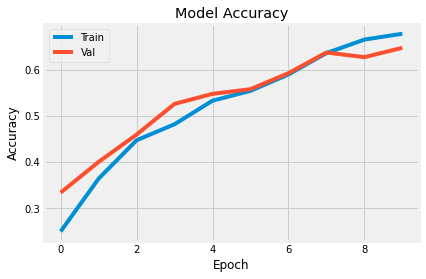

In [262]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

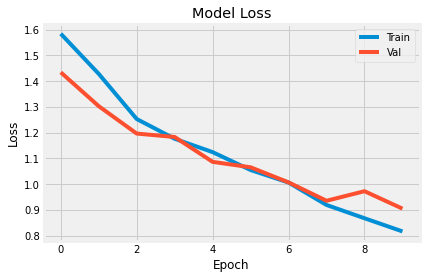

In [263]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Testing on Images


# **1.**

In [224]:
from google.colab import files
uploaded = files.upload()

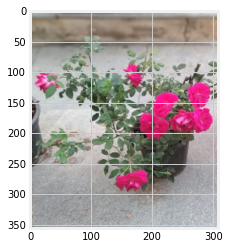

In [264]:
new_image = plt.imread('rose2.PNG')
img = plt.imshow(new_image) #display image

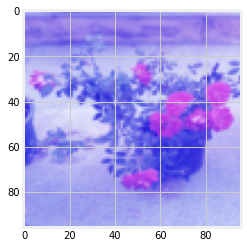

In [265]:
#resize the image
from skimage.transform import resize
resized_image = resize(new_image, (96,96,3))
img = plt.imshow(resized_image) #display resized image

In [266]:
predict = model.predict(np.array([resized_image]))
#Show the predictions
predict

array([[3.2390142e-03, 1.3605036e-03, 7.5572228e-01, 7.0787704e-04,
        2.3897034e-01]], dtype=float32)

In [267]:
# Sort the predictions
list1= [0,1,2,3,4]
x = predict

for i in range(5):
  for j in range(5):
    if x[0][list1[i]] > x[0][list1[j]]:
      temp = list1[i]
      list1[i] = list1[j]
      list1[j] = temp

print(list1)

[2, 4, 0, 1, 3]


Display Prediction

In [268]:
for i in range(5):
  print(lb.classes_[list1[i]], ':', round(predict[0][list1[i]]*100,2), '%')

rose : 75.57 %
tulip : 23.9 %
daisy : 0.32 %
dandelion : 0.14 %
sunflower : 0.07 %


## **2.**

In [293]:
from google.colab import files
uploaded = files.upload()

Saving tulip.jpg to tulip.jpg


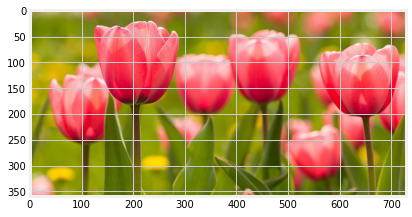

In [294]:
new_image = plt.imread('tulip.jpg')
img = plt.imshow(new_image) #display image

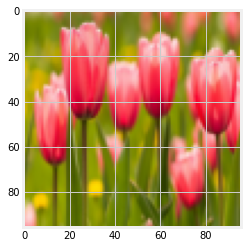

In [295]:
#resize the image
from skimage.transform import resize
resized_image = resize(new_image, (96,96,3))
img = plt.imshow(resized_image) #display resized image

In [296]:
predict1 = model.predict(np.array([resized_image]))
#Show the predictions
predict1

array([[0.02493574, 0.03205086, 0.10250682, 0.2224706 , 0.61803603]],
      dtype=float32)

In [297]:
#Sort the predictions
list2= [0,1,2,3,4]
x = predict1

for i in range(5):
  for j in range(5):
    if x[0][list2[i]] > x[0][list2[j]]:
      temp = list2[i]
      list2[i] = list2[j]
      list2[j] = temp

print(list2)

[4, 3, 2, 1, 0]


**Display Predictions**

In [298]:
for i in range(5):
  print(lb.classes_[list2[i]], ':', round(predict1[0][list2[i]]*100,2), '%')

tulip : 61.8 %
sunflower : 22.25 %
rose : 10.25 %
dandelion : 3.21 %
daisy : 2.49 %
